# Analise de Receitas
O projeto consiste em uma análise exploratória dos dados públicos de receitas governamentais dos anos de 2013 a 2019 obtidos no site http://www.portaldatransparencia.gov.br/download-de-dados/receitas. O objetivo é aplicar técnicas de plotagem de gráficos e utilização do Pandas para explorar os dados em busca de informações.

In [10]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# como vamos trabalhar com valores grandes precisamos formatar os floats do pandas para não ter problemas.
pd.options.display.float_format = '{:,.2f}'.format
# Campos que serão utilizados
cols = [
    'NOME ÓRGÃO SUPERIOR',
    'CATEGORIA ECONÔMICA',
    'ORIGEM RECEITA',
    'VALOR PREVISTO ATUALIZADO',
    'VALOR REALIZADO',
    'DATA LANÇAMENTO'
]
# range para pegar todos os dados de todos os arquivos
years = range(2013, 2020)
# lista onde será armazenado os registros
receitas = []

# percorre os anos extraindo as informações de cada ano e armazenando na lista
for year in years:
    arc = f'{year}_receitas.csv'
    receita = pd.read_csv(arc, usecols=cols, quotechar='"', 
                           encoding='iso-8859-15', sep=';')
    receitas.append(receita)
    
# Concatena a lista criando um dataframe único.
df = pd.concat(receitas, ignore_index=False)

In [12]:
# Criando coluna apenas com o mês e o ano
df['MES_ANO'] = df['DATA LANÇAMENTO'].str[3:]

Neste ponto vamos criar um novo dataset com três informações e manipula-las a fim de ver os periodos em que as receitas são maiores.

In [18]:
# Criação do novo dataframe
df_mes_ano = df[['VALOR PREVISTO ATUALIZADO','VALOR REALIZADO', 'MES_ANO']]
# renomear as colunas utilizando o rename do Pandas, o parâmetro inplace indica que será feito a modificação no próprio
# dataframe, se esse parâmetro não for utilizado a modificação é descartada se não for atribuída a uma variável.
df_mes_ano.rename(columns={
    'VALOR PREVISTO ATUALIZADO': 'val_previsto',
    'VALOR REALIZADO': 'val_realizado',
    'MES_ANO': 'mes_ano'
}, inplace=True)

In [19]:
# Vamos substituir a virgula dos valores por ponto, assim podemos converte-las para float.
df_mes_ano['val_realizado'] = df_mes_ano['val_realizado'].str.replace(',', '.')
df_mes_ano['val_previsto'] = df_mes_ano['val_previsto'].str.replace(',', '.')

C:\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# convertendo os valores para float, com isso podemos soma-los e fazer outras operações.
df_mes_ano['val_realizado'] = pd.to_numeric(df_mes_ano['val_realizado'], downcast='float', errors='coerse')
df_mes_ano['val_previsto'] = pd.to_numeric(df_mes_ano['val_previsto'], downcast='float', errors='coerse')

C:\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
"""
Neste ponto vamos criar um campo no dataframe para o mês e outro para o ano, dessa forma conseguiremos organizar
o DataFrame para plotar o gráfico de forma mais legível. Cada barra representará sua barra e o eixo X recebera os 
meses.
Além disso vamos separa em dois gráficos, um para os valores realizados e outro para os valores previstos, novamente 
vamos separar para deixar os gráficos mais legíveis, se unirmos todas essas informações em um só gráfico, teremos 
algo muito poluído.
"""

df_mes_ano['mes'] = df_mes_ano['mes_ano'].str[:2]
df_mes_ano['ano'] = df_mes_ano['mes_ano'].str[3:]

mes_ano = df_mes_ano.pivot_table(['val_previsto', 'val_realizado'], index='mes', columns='ano', aggfunc=sum)
mes_ano

C:\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


val_previsto                                            \
ano                 2013                 2014                 2015   
mes                                                                  
01                   nan                  nan                  nan   
02                   nan                  nan                  nan   
03                   nan                  nan                  nan   
04                   nan                  nan                  nan   
05                   nan                  nan                  nan   
06                   nan                  nan                  nan   
07                   nan                  nan                  nan   
08                   nan                  nan                  nan   
09                   nan                  nan                  nan   
10                   nan                  nan                  nan   
11                   nan                  nan                  nan   
12  1,790,805,540,864.00 1,958,017,368,064.00 2,409,925,705,728.00   

                                                                    \
ano                 2016                 2017                 2018   
mes                                                                  
01  2,505,970,548,736.00 2,950,176,440,320.00 3,002,644,299,776.00   
02                  0.00                 0.00                 0.00   
03                  0.00                 0.00                 0.00   
04                  0.00                 0.00                 0.00   
05                  0.00                 0.00                 0.00   
06         49,838,880.00                 0.00                 0.00   
07                  0.00        53,118,100.00                 0.00   
08                  0.00                 0.00        43,637,748.00   
09                  0.00                 0.00                 0.00   
10                  0.00                 0.00                 0.00   
11                  0.00                 0.00                 0.00   
12                  0.00                 0.00                 0.00   

                                val_realizado                       \
ano                 2019                 2013                 2014   
mes                                                                  
01  2,512,650,240,000.00                  nan                  nan   
02                  0.00                  nan                  nan   
03                  0.00                  nan                  nan   
04                  0.00                  nan                  nan   
05                  0.00                  nan                  nan   
06                  0.00                  nan                  nan   
07                  0.00                  nan                  nan   
08                  0.00                  nan                  nan   
09                   nan                  nan                  nan   
10                   nan                  nan                  nan   
11                   nan                  nan                  nan   
12                   nan 1,562,273,775,616.00 1,874,726,486,016.00   

                                                                \
ano                 2015               2016               2017   
mes                                                              
01                   nan 216,149,524,480.00 327,643,332,608.00   
02                   nan 136,378,097,664.00 172,269,338,624.00   
03                   nan 611,652,534,272.00 177,649,631,232.00   
04                   nan 191,578,636,288.00 178,476,105,728.00   
05                   nan 145,844,404,224.00 130,798,936,064.00   
06                   nan 153,356,894,208.00 166,703,087,616.00   
07                   nan 209,218,781,184.00 162,624,454,656.00   
08                   nan 153,288,687,616.00 195,371,532,288.00   
09                   nan 195,167,158,272.00 195,060,252,672.00   
10                   nan 379,217,313,792.00 188,201,484,288.00   
1

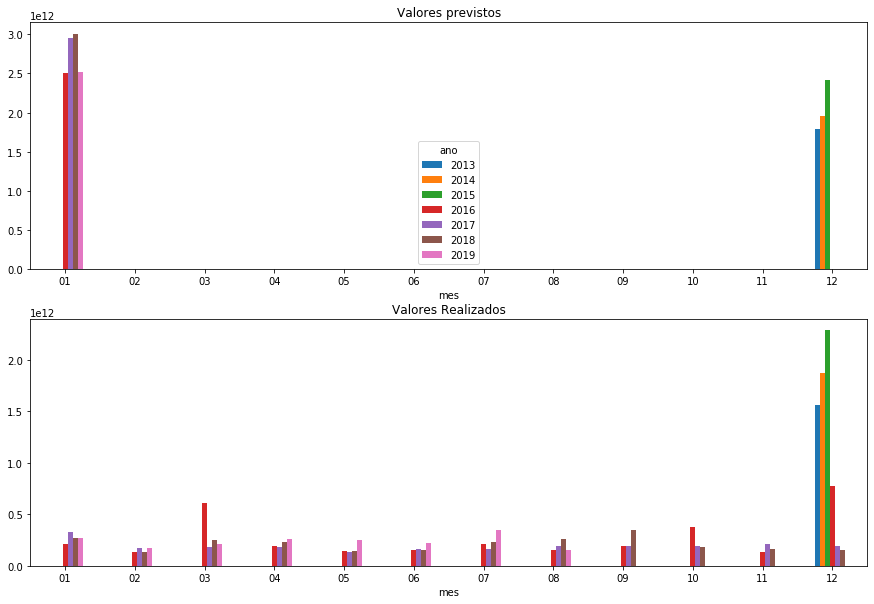

In [43]:
# Plotagem dos Gráficos.
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
mes_ano['val_previsto'].plot(kind='bar', rot=0, ax=axes[0], 
                             title='Valores previstos')
mes_ano['val_realizado'].plot(kind='bar', rot=0, ax=axes[1],
                      title='Valores Realizados', legend=False)

Com base nos gráficos podemos ver a distribuição das receitas durante o ano, porém os anos de 2013 a 2015 só tem lançamentos feitos no mês de dezembro e não mês a mês como feito no restante dos dados.
O ano de 2019 só possui informações até o mês 8, mês em que o projeto está sendo feito.

Vamos criar um novo gráfico, agrupado apenas por ano para ver ano teve a maior receita, e comparar o valor previsto com o realizado.

In [40]:
ano = df_mes_ano.pivot_table(['val_previsto', 'val_realizado'], index='ano', aggfunc=sum)
ano

,val_previsto,val_realizado
ano,,
2013,"1,790,805,540,864.00","1,562,273,775,616.00"
2014,"1,958,017,368,064.00","1,874,726,486,016.00"
2015,"2,409,925,705,728.00","2,283,533,500,416.00"
2016,"2,506,020,356,096.00","3,297,695,498,240.00"
2017,"2,950,229,655,552.00","2,304,358,481,920.00"
2018,"3,002,688,077,824.00","2,539,121,016,832.00"
2019,"2,512,650,240,000.00","1,892,474,814,464.00"


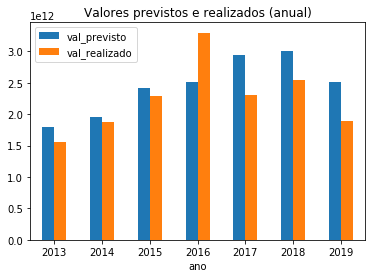

In [41]:
ano.plot(kind='bar', rot=0, title='Valores previstos e realizados (anual)')